# Modelling and Evaluation

## Objectives

* Business Requirements # 1 - The clients wants to know if the cherry leaf in the picture is healthy or if it has powdery mildew.

## Inputs

* inputs/cherry_leaves/cherry-leaves/train
* inputs/cherry_leaves/cherry-leaves/test
* inputs/cherry_leaves/cherry-leaves/validation

## Outputs

* Images distribution plot in train, validation, and test set.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model as mildew_detection_model.h5.
* Learning curve plot for model performance.
* Model evaluation pickle file.
* Prediction on the random image file.

## Additional Comments

* CI Malaria Detector Walkthrough project code was used as study and reference material.



---

# Change working directory

Change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/milestone-project-mildew-detection-in-cherry-leaves'

---

## Import packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

---

## Set input directories

Set train, validation and test paths.

In [13]:
my_data_dir = 'inputs/cherry_leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directories

In [14]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(current_dir) and version in os.listdir(current_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set labels

In [15]:
labels = os.listdir(train_path)

print(
    f"Image Labels: {labels}"
)

Image Labels: ['healthy', 'powdery_mildew']


## Set image shape

In [16]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

# Number of images is train, test and validation data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




/tmp/ipykernel_36879/2037828740.py:31: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:y'` for the same effect.

  sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label', color='y', edgecolor='g')


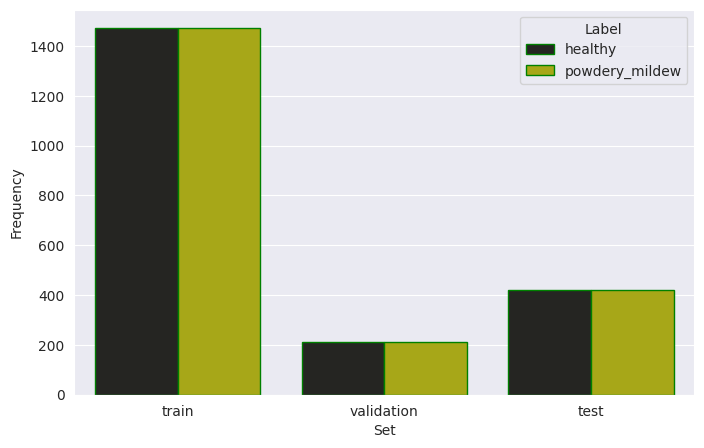

In [19]:
# Predefine DataFrame with columns for better clarity and structure
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

# Iterate through train, validation, and test folders
for folder in ['train', 'validation', 'test']:
    for label in labels:
        # Calculate frequency (number of files in the folder)
        folder_path = os.path.join(my_data_dir, folder, label)
        frequency = len(os.listdir(folder_path))

        # Create a new row as a DataFrame
        new_row = pd.DataFrame([{
            'Set': folder,
            'Label': label,
            'Frequency': frequency
        }])

        # Use pd.concat() instead of append() to add the row to the DataFrame
        df_freq = pd.concat([df_freq, new_row], ignore_index=True)

        # Print out the number of images in the current label
        print(f"* {folder} - {label}: {frequency} images")

print("\n")

# Set Seaborn style
sns.set_style("darkgrid")

# Create the bar plot with the data
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label', color='y', edgecolor='g')

# Save the plot to the specified directory
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)

# Display the plot
plt.show()

---


## Image data augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-02-02 11:05:23.660822: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-02 11:05:23.692329: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


* Initalize ImageDataGenerator

In [21]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

## Augment training image dataset

In [22]:
# Set batch size
batch_size = 20
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [23]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [24]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

---

# Plot augmented training image

(20, 256, 256, 3)


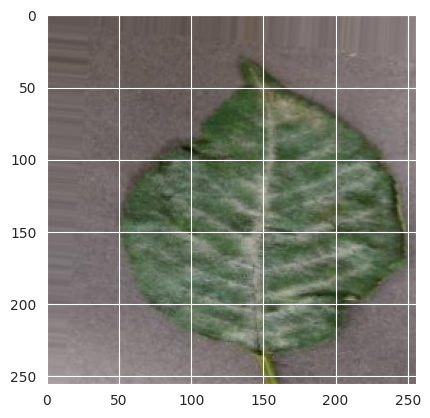

(20, 256, 256, 3)


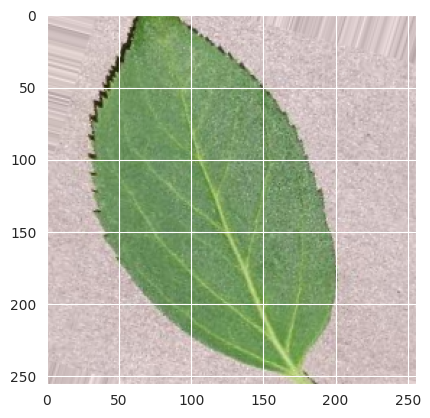

(20, 256, 256, 3)


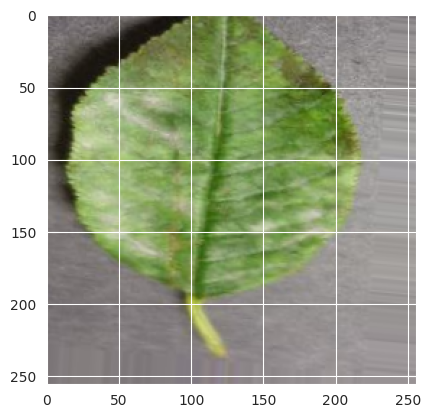

In [26]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Plot augmented validation image

(20, 256, 256, 3)


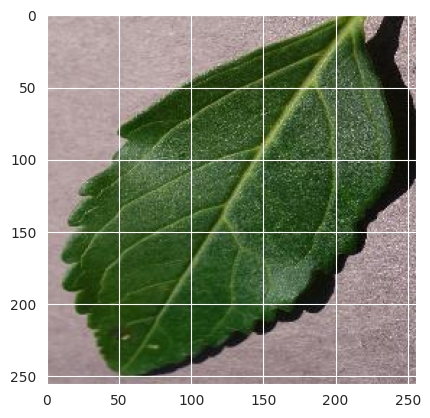

(20, 256, 256, 3)


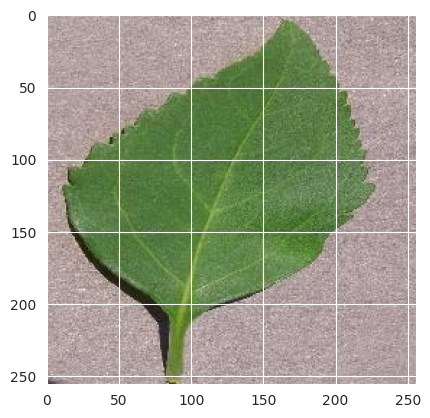

(20, 256, 256, 3)


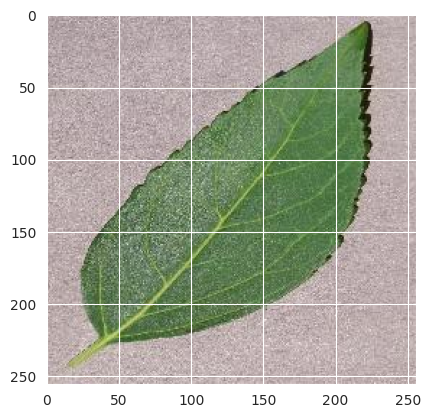

In [27]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Plot augmented test image

(20, 256, 256, 3)


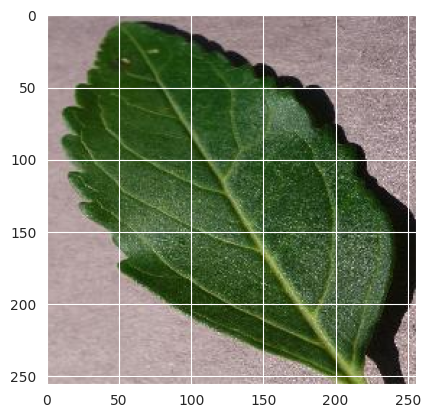

(20, 256, 256, 3)


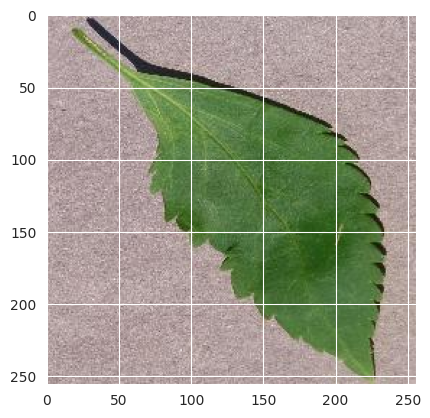

(20, 256, 256, 3)


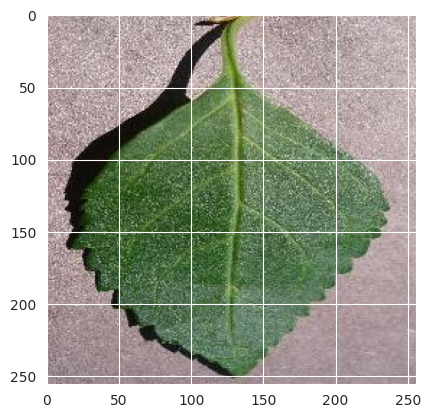

In [28]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)   
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [29]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

---

## Model creation

### ML model

* Import packages

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

#### Model

Feature Extraction:

* Images' borders, textures, and patterns are picked up by the Conv2D layers.
* MaxPooling preserves key features while reducing size.

Classification:

* The extracted characteristics are transformed into a vector using the Flatten layer.
* High-level correlations and patterns are learned by the Dense layers.
* The Dropout layer disables neurons at random to avoid overfitting.
* The final layer's Sigmoid activation produces a categorization probability.

In [32]:
def create_tf_model():
    """
    Create a sequential model for binary image classification.
    """
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=8, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), input_shape=image_shape,
              activation='relu', ))

    model.add(Flatten())
    model.add(Dense(128, activation='relu')) 
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

    return model

#### Model summary

In [33]:
create_tf_model().summary()

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 8)    │         2,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 8)      │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,610,849 (6.14 MB)

 Trainable params: 1,610,849 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

#### Early stopping

* Add early stopping to prevent model from overfitting

In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3)

### Fit model for model training

In [61]:
model = create_tf_model()
model.fit(train_set,
          epochs=25,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1
          )

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 64s 417ms/step - accuracy: 0.7497 - loss: 0.4931 - val_accuracy: 0.9381 - val_loss: 0.1520
Epoch 2/25
  1/147 ━━━━━━━━━━━━━━━━━━━━ 39s 271ms/step - accuracy: 0.9000 - loss: 0.2635

/home/cistudent/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9000 - loss: 0.2635 - val_accuracy: 0.9476 - val_loss: 0.1306
Epoch 3/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 77s 405ms/step - accuracy: 0.9734 - loss: 0.0836 - val_accuracy: 0.9976 - val_loss: 0.0061
Epoch 4/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 1.0000 - loss: 0.0143 - val_accuracy: 0.9976 - val_loss: 0.0057
Epoch 5/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 61s 412ms/step - accuracy: 0.9781 - loss: 0.0646 - val_accuracy: 0.9976 - val_loss: 0.0091
Epoch 6/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 1.0000 - loss: 0.0339 - val_accuracy: 0.9976 - val_loss: 0.0083
Epoch 7/25
147/147 ━━━━━━━━━━━━━━━━━━━━ 61s 413ms/step - accuracy: 0.9917 - loss: 0.0299 - val_accuracy: 0.9976 - val_loss: 0.0102


### Save Model

In [62]:
model.save('outputs/v1/mildew_detection_model.keras') # load new .keras model

---

## Model Performance

### Model learning curve

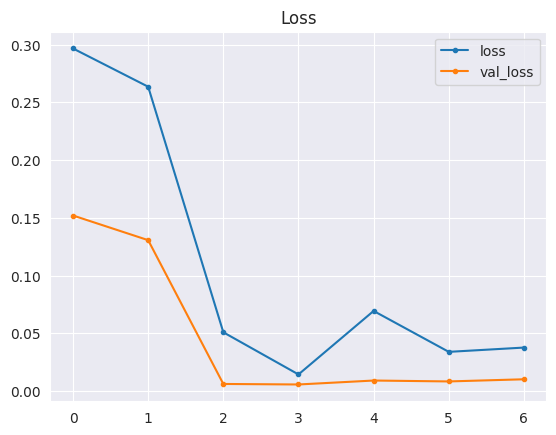

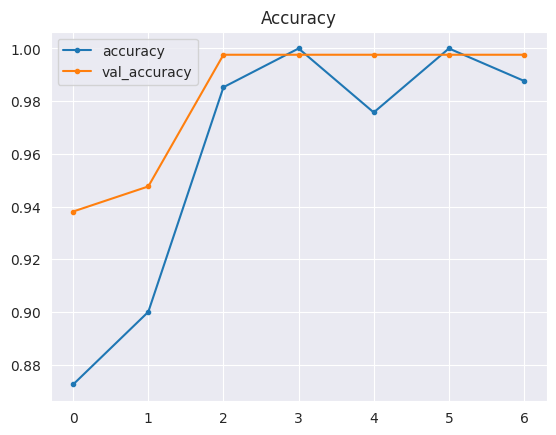

In [63]:
losses = pd.DataFrame(model.history.history)

sns.set_style("darkgrid")
losses[['loss','val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()


print("\n")
losses[['accuracy','val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

### Model Evaluation


* Load saved model

In [64]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detection_model.keras')

* Evaluate model on test set.

In [65]:
evaluation = model.evaluate(test_set)

43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.9943 - loss: 0.0179


### Save evaluation pickle

In [66]:
joblib.dump(value=evaluation ,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

### Predict on new data

* Load a random image as PIL

Image shape: (256, 256), Image mode: RGB


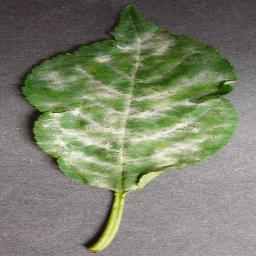

In [67]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[1] # select healthy or Powdery Mildew

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

* Convert image to array and prepare for prediction

In [68]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


* Predict class probabilities

In [69]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1.0
powdery_mildew


# Push files to Repo

.gitignore

In [71]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json
*.zip
/inputs/cherry_leaves/cherry-leaves/train/*
/inputs/cherry_leaves/cherry-leaves/test/*
/inputs/cherry_leaves/cherry-leaves/validation/*